In [24]:
#주로 자주 import하는 전처리기
#from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
%matplotlib inline

#한글 출력
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Users/swany/malgun.ttf").get_name()
rc('font',family=font_name)

In [25]:
#Gradient Boosting Regression
#다수의 결정트리 기반 앙상블
#간단한 다수의 모델을 연결하여 작동하며,
#이전 모델의 오류를 최소화하기 위해 작동함.
#주 변수 : Learning rate(학습률) : 0.0~1.0
#          n_estimator(zms (큰 값)

In [26]:
#Gradient Boosting Cancerdata 활용
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#X,y=cancer.data,cancer.target
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [27]:
#깊이 3 트리 100개. 과대적합.

In [30]:
from sklearn.model_selection import cross_val_score

cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean() ))

테스트 세트 정확도 CV = 10: 0.960

테스트 세트 정확도 CV = 5: 0.963



In [23]:
#트리의 최대 깊이를 낮춤 >> 과적합을 피하고 테스트 데이터 성능 향상
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean() ))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972
테스트 세트 정확도 CV = 10: 0.961

테스트 세트 정확도 CV = 5: 0.965



In [31]:
#학습률 낮춤 >> 과적합을 피하고 테스트 데이터 성능 향상
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean() ))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965
테스트 세트 정확도 CV = 10: 0.946

테스트 세트 정확도 CV = 5: 0.944



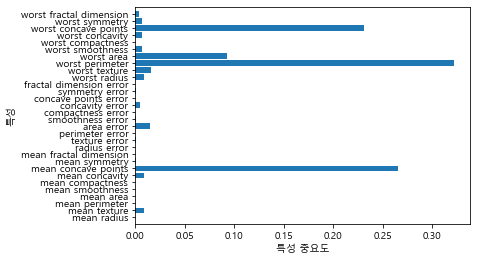

In [33]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(gbrt)

In [34]:
#forese와 비교해 적은 양의 속성을 이용함을 알 수 있다.

In [35]:
#Ensenle Method-모델을 여러개 사용하여 성능 향상 모색
#여러개의 모델을 준비하고, 훈련 샘플을 여러번 사용하여 훈련. 앙상블이 투표를바탕으로 결과를 예측.

In [43]:
#데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons( n_samples =500, noise=0.30, random_state =42)
X_train, X_test , y_train , y_test = train_test_split (X, y, random_state =42)
#보팅클래스 : 랜덤포레스트 , 로지스틱회귀 , 결정트리
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [44]:
log_clf = LogisticRegression ( solver="lbfgs", random_state = 42)
rnd_clf = RandomForestClassifier (n_estimators =100, random_state = 42)
dt_clf = DecisionTreeClassifier (max_depth = 3, random_state =42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf ), ('rf', rnd_clf ), ('dt', dt_clf)],
    voting='hard')
voting_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [45]:
from sklearn.metrics import accuracy_score
for clf in ( log_clf , rnd_clf , dt_clf , voting_clf):
    clf.fit(X_train , y_train)
    y_pred= clf.predict (X_test)
    print(clf.__class__.__name__, accuracy_score(y_test , y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [46]:
#비교 - soft의 경우
#데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons( n_samples =500, noise=0.30, random_state =42)
X_train, X_test , y_train , y_test = train_test_split (X, y, random_state =42)
#보팅클래스 : 랜덤포레스트 , 로지스틱회귀 , 결정트리
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression ( solver="lbfgs", random_state = 42)
rnd_clf = RandomForestClassifier (n_estimators =100, random_state = 42)
dt_clf = DecisionTreeClassifier (max_depth = 3, random_state =42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf ), ('rf', rnd_clf ), ('dt', dt_clf)],
    voting='soft')
voting_clf.fit(X_train , y_train)

from sklearn.metrics import accuracy_score
for clf in ( log_clf , rnd_clf , dt_clf , voting_clf):
    clf.fit(X_train , y_train)
    y_pred= clf.predict (X_test)
    print(clf.__class__.__name__, accuracy_score(y_test , y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [48]:
#OOB 평가
#이용되지 않은 데이터를 표현. 일반적으로 37%가 oob
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap=True , oob_score =True , random_state =40)
bag_clf.fit(X_train , y_train)

#obb score 출력
print("oob_score:",bag_clf.oob_score)

#decisiontree bagging
y_pred= bag_clf.predict(X_test)
accuracy_score(y_test , y_pred)

oob_score: True


0.912

In [50]:
#XGBoost : Gradient Boosting을 최적화.
#빠른 속도, 확장성, 이식성.
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators =100, max_depth =3, random_state=42,eval_metric='logloss')
xgb_clf.fit(X_train , y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.872

In [51]:
#SVM
#딥너링 이전부터 꾸준히 사용된 데이터 분류 모델.
#둘 이상의 데이터를 분류하기 위해 중간선/중간평면 등을 찾아 표현.

Text(0, 0.5, '특성 1')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


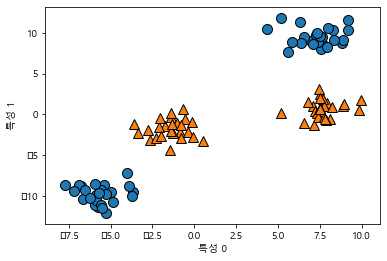

In [72]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\swany\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

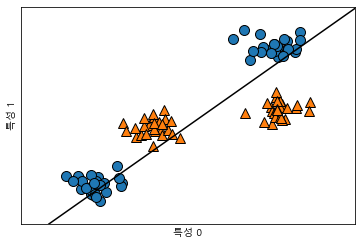

In [73]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1 ** 2')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


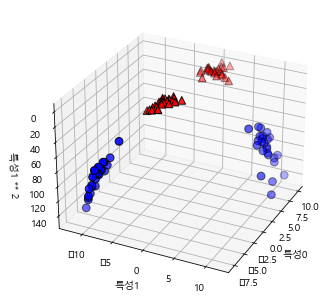

In [74]:
# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\swany\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


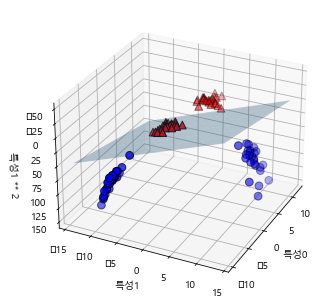

In [75]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


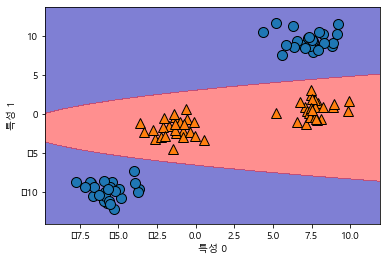

In [76]:
#타원형 결정경계 표시
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
#저차원을 고차원으로 매핑한 것 >> 공간 매핑
#커널 트릭 : 새로운 특성을 추가하지 않고 고차원에서 분류기를 학습
#커널 함수는 gamms(커널폭제어)가 작을수록 넓은 마진을 가진다.

Text(0, 0.5, '특성 1')

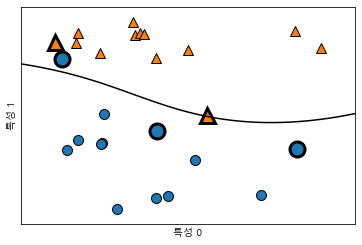

In [77]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

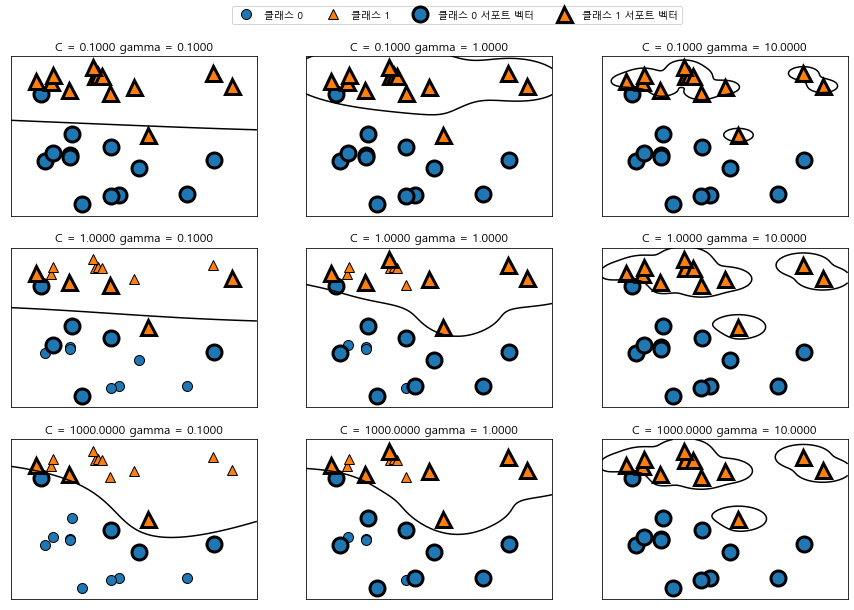

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

In [79]:
#왼쪽으로 갈 수록 다수포인트 고려, 오른쪽으로 갈수록 특정 포인트에 민감한 복잡한 모델.
#위로 갈 수록 과소적합. 각 포인트의 영향력 감소. 아래로 갈수록 과대적함. 각 포인트의 영향력이 큼

In [81]:
#훈련 데이터에 과대적합, cancer data 참고.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [85]:
#하지만 테이터 전처리를 하지 않으면 작업하기가 어렵다.

In [94]:
#전처리 작업
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [98]:
#라지마진 분류와 소프트마진분류
#라지마진 : 모든 샘플이 도로 바깥쪽으로 올바르게 분류되어 있는 것
#소프트마진 : 라지마진과 마진 오류 사이에 균형을 두는 것

In [99]:
#linerSVC, SVC 각각의 장점이 있음

In [111]:
#Iris를 이용한 예시_1_LInearSVC
from sklearn.metrics import confusion_matrix
from sklearn import datasets

iris_dataset=datasets.load_iris()
X_train,X_test,y_train,y_test=train_test_split(
    iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.80)

C:\Users\swany\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

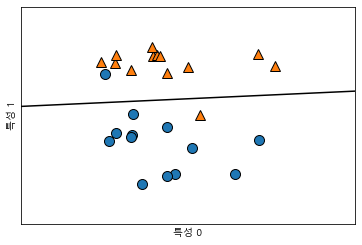

In [112]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1 ** 2')

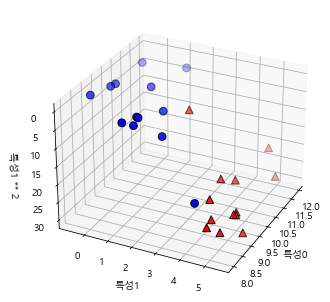

In [113]:
# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\swany\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


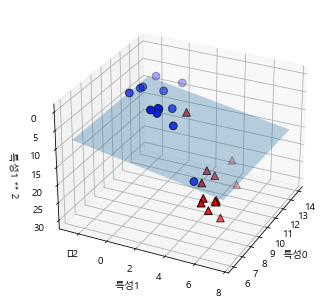

In [114]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


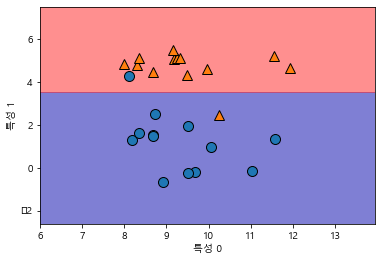

In [115]:
#타원형 결정경계 표시
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [116]:
#예시_2_SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.93
테스트 세트 정확도: 0.92


In [117]:
#전처리 작업
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
[0. 0. 0. 0.]
특성별 최대 값
 [1. 1. 1. 1.]


In [118]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.917


In [119]:
#신경망 모델

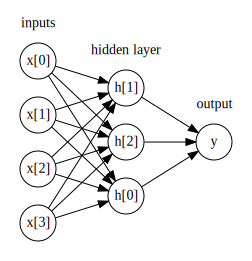

In [120]:
#신경망은 MLP를 이용해 은닉층을 총해, 여러단게를 거쳐 결정을 만들어내는 선형모델이다.
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\swany\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


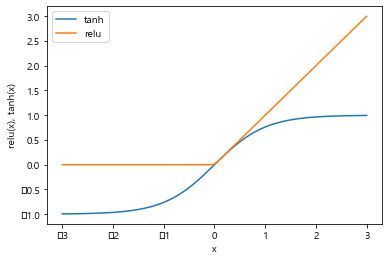

In [121]:
#또한 활성화 함수를 이용해 분석한다.
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0, 0.5, '특성 1')

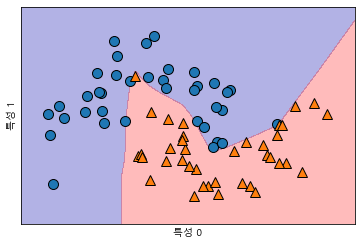

In [122]:
#다층 퍼셉트론
#MLPClassifier를 이용한다.
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\swany\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

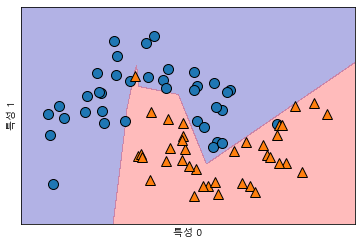

In [123]:
#hidden layer size를 변경하면 경계를 날카롭게 하고 뚜렷한 경계를 만들 수 있다.
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

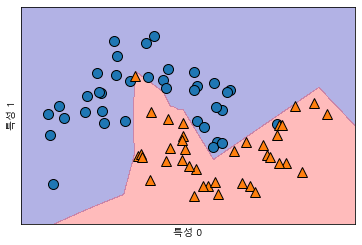

In [124]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\swany\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

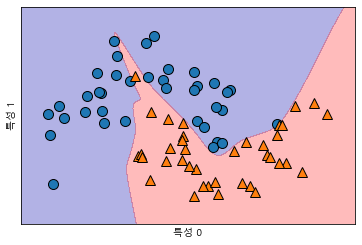

In [125]:
#tanh함수 활성화시
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\swany\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

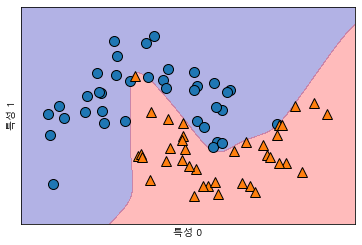

In [126]:
#logistic 활성화시
mlp = MLPClassifier(solver='lbfgs', activation='logistic',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\swany\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\swany\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


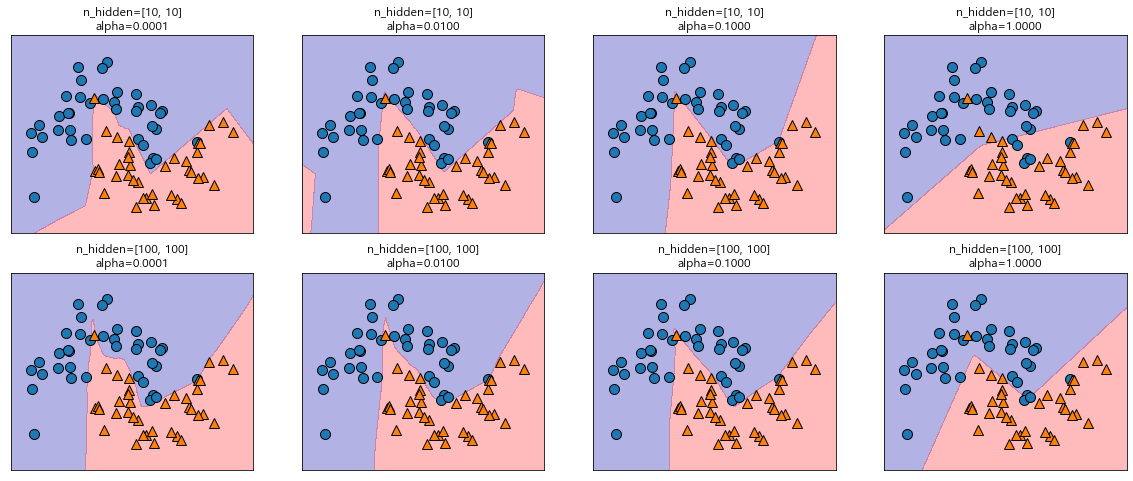

In [128]:
#alpha 복잡도 비교를 하면 다음과 같다.
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

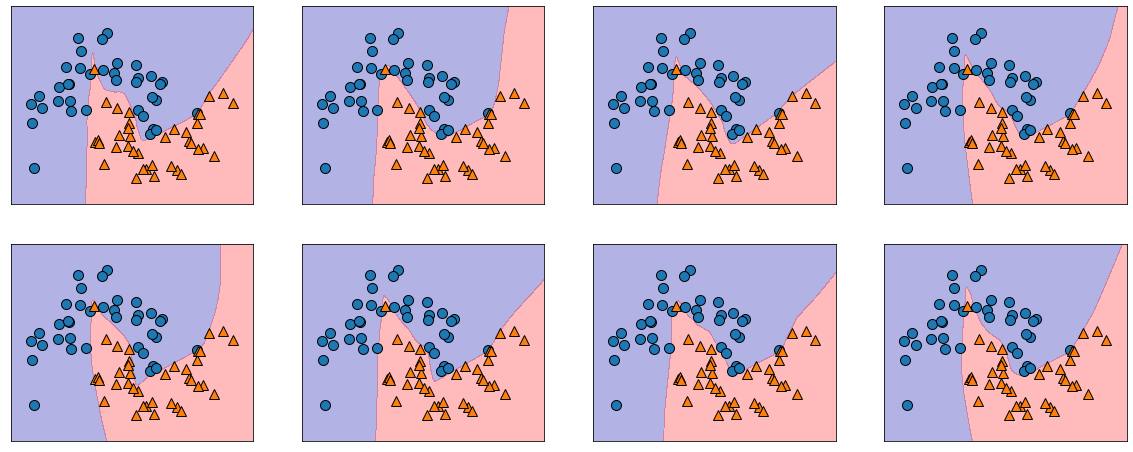

In [129]:
#가중치 초기 랜덤 설정을 하면 다음과 같다.
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)

    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [130]:
#유방암 데이터 활용
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [131]:
# 훈련 세트 각 특성의 평균을 계산합니다.
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다.
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\swany\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [132]:
#그러나 스케일 조정이 필요하다.

In [133]:
#alahp값을 변경시켜 반복횟수를 조정한다.
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [134]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [136]:
#충분한 시간과 데이터가 있으면 배우 복잡한 모델을 만들어내나, 
#데이터 전처리에 민감하고, 이종의 데이터 타입일 경우 잘 맞지 않다.

In [137]:
#다중 분류의 불확실성
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [138]:
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]
